# Test des modeles de segmentation et classification sur le nouveau dataset
Au prealable, on a selectionne 723 images non redondantes avec le dataset initial depuis le jeu de donnees COVIDNET
On conserve les sources actmed, fig1, cohen


In [1]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
%matplotlib inline
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler



In [2]:
# Import des donnees 

path = r"C:\Users\Inrae\Documents\Projet_Data_Science\COVID_NET\SELECT"
dim=256
final_size=(dim, dim)

# Import des données on sépare entre apprentissage et validation
batch_size=32
size=final_size

# Nombre de donnes max par categorie
size_max_cat = None



## Import des fichiers

In [3]:
def getData(X_shape, N = None):
    im_array = []
    target_array = []

    for cat in ["Normal", "COVID"]:       
        image_path = os.path.join(path,cat)
        target = cat
        files = os.listdir(image_path)
        random.Random(1337).shuffle(files)
        
        if (N is None):
            N = len(files)
        else:
            N = min(N, len(files))
        for i in files[:N]: 
            im = cv2.resize(cv2.imread(os.path.join(image_path,i)),(X_shape,X_shape))[:,:,0]
            target=cat
            im_array.append(im)
            target_array.append(target)
            
    images = np.array(im_array).reshape(len(im_array),dim,dim,1)
    return images, target_array


In [4]:
# Importing data
dim = 256
images, labels = getData(dim,N=size_max_cat)

print("dataset size : images", images.shape, "labels", len(labels))


dataset size : images (723, 256, 256, 1) labels 723


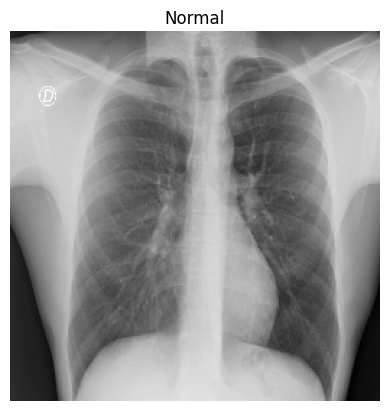

In [5]:
# On verifie que l'import s'est bien passé
i=3

plt.imshow(images[3], cmap="gray")
plt.axis("off")
plt.title(labels[3])
plt.show()

## Segmentation : Génération des masques

In [6]:
# # Il faudrait decorer la sauvegarde
model_seg = tf.keras.models.load_model("cxr_reg_segmentation.best.keras")

In [7]:
# Mise en forme des images

images_scaled = (images-127)/127

print("Shape de image_scaled: ", images_scaled.shape, "type de image_scaled: ", images_scaled.dtype)

# On fait un data_generator

datagen = ImageDataGenerator() 

# Augmenter respectivement les jeu de données d'entrainement
dataset = datagen.flow(images_scaled, batch_size = 8, shuffle=False)

# # On predit sur dataset
masks = model_seg.predict(dataset)

# # On convertit en 0-255
# masks2 = masks
# masks2[masks2>0.5] = 255
# masks2[masks2<=0.5] = 0



Shape de image_scaled:  (723, 256, 256, 1) type de image_scaled:  float64


c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32,), but the yielded element was [[[[0.44094488]
   [0.53543305]
   [0.5590551 ]
   ...
   [0.54330707]
   [0.53543305]
   [0.54330707]]

  [[0.503937  ]
   [0.56692916]
   [0.5826772 ]
   ...
   [0.5590551 ]
   [0.5590551 ]
   [0.54330707]]

  [[0.5511811 ]
   [0.56692916]
   [0.5826772 ]
   ...
   [0.5826772 ]
   [0.5748032 ]
   [0.56692916]]

  ...

  [[0.39370078]
   [0.37795275]
   [0.4015748 ]
   ...
   [0.38582677]
   [0.36220473]
   [0.31496063]]

  [[0.33858266]
   [0.39370078]
   [0.36220473]
   ...
   [0.37795275]
   [0.36220473]
   [0.32283464]]

  [[0.2992126 ]
   [0.39370078]
   [0.28346458]
   ...
   [0.26771653]
   [0.24409449]
   [0.26771653]]]


 [[[1.015748  ]
   [1.015748  ]
   [1.015748  ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.015748  ]]

  [[1.0551181 ]
   [1.0551181 ]
   [1.0551181 ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.015748  ]]

  [[1.1259843 ]
   [1.1259843 ]
   [1.1338583 ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.015748  ]]

  ...

  [[0.08661418]
   [0.10236221]
   [0.12598425]
   ...
   [1.7952756 ]
   [1.7952756 ]
   [1.8031496 ]]

  [[1.4330709 ]
   [1.480315  ]
   [1.472441  ]
   ...
   [1.3464566 ]
   [1.3385826 ]
   [1.3228346 ]]

  [[1.015748  ]
   [1.015748  ]
   [1.015748  ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.015748  ]]]


 [[[1.2519685 ]
   [1.2440945 ]
   [1.2519685 ]
   ...
   [1.0944881 ]
   [1.1023622 ]
   [1.1023622 ]]

  [[1.2440945 ]
   [1.2519685 ]
   [1.2362205 ]
   ...
   [1.0866141 ]
   [1.0944881 ]
   [1.0944881 ]]

  [[1.2519685 ]
   [1.2362205 ]
   [1.2440945 ]
   ...
   [1.0944881 ]
   [1.0944881 ]
   [1.0944881 ]]

  ...

  [[1.2204725 ]
   [1.2047244 ]
   [1.2047244 ]
   ...
   [1.1181102 ]
   [1.1181102 ]
   [1.1259843 ]]

  [[1.2204725 ]
   [1.2204725 ]
   [1.1968504 ]
   ...
   [1.1181102 ]
   [1.1181102 ]
   [1.1259843 ]]

  [[1.2125984 ]
   [1.2047244 ]
   [1.1968504 ]
   ...
   [1.1259843 ]
   [1.1181102 ]
   [1.1259843 ]]]


 ...


 [[[0.03149606]
   [0.16535433]
   [0.10236221]
   ...
   [1.0866141 ]
   [1.0787401 ]
   [1.503937  ]]

  [[0.        ]
   [1.8582677 ]
   [0.10236221]
   ...
   [1.023622  ]
   [1.015748  ]
   [1.4409449 ]]

  [[1.984252  ]
   [1.8661417 ]
   [0.03149606]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.4409449 ]]

  ...

  [[1.015748  ]
   [1.015748  ]
   [1.015748  ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.4488189 ]]

  [[1.015748  ]
   [1.015748  ]
   [1.015748  ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.4488189 ]]

  [[1.2283465 ]
   [1.2283465 ]
   [1.2283465 ]
   ...
   [1.2283465 ]
   [1.2283465 ]
   [1.6062992 ]]]


 [[[1.9527559 ]
   [1.7480315 ]
   [1.7244095 ]
   ...
   [1.7716535 ]
   [1.7795275 ]
   [1.7165354 ]]

  [[1.6299213 ]
   [1.6299213 ]
   [1.6299213 ]
   ...
   [1.7874016 ]
   [1.7874016 ]
   [1.7637795 ]]

  [[1.5433071 ]
   [1.6299213 ]
   [1.6929134 ]
   ...
   [1.8031496 ]
   [1.8188976 ]
   [1.8110236 ]]

  ...

  [[1.1732284 ]
   [1.1496063 ]
   [1.1417323 ]
   ...
   [1.1102362 ]
   [1.1181102 ]
   [1.1259843 ]]

  [[1.1653544 ]
   [1.1574804 ]
   [1.1496063 ]
   ...
   [1.1102362 ]
   [1.1181102 ]
   [1.1338583 ]]

  [[1.2204725 ]
   [1.1811024 ]
   [1.1653544 ]
   ...
   [1.1181102 ]
   [1.1338583 ]
   [1.1338583 ]]]


 [[[1.3070866 ]
   [1.3149606 ]
   [1.3307086 ]
   ...
   [1.0472441 ]
   [1.0472441 ]
   [1.0472441 ]]

  [[1.3307086 ]
   [1.3464566 ]
   [1.3464566 ]
   ...
   [1.0472441 ]
   [1.0472441 ]
   [1.0472441 ]]

  [[1.3622047 ]
   [1.3858268 ]
   [1.3858268 ]
   ...
   [1.0472441 ]
   [1.0472441 ]
   [1.0472441 ]]

  ...

  [[1.472441  ]
   [1.5984251 ]
   [1.6692914 ]
   ...
   [1.0708661 ]
   [1.0708661 ]
   [1.0708661 ]]

  [[1.503937  ]
   [1.5748031 ]
   [1.6850394 ]
   ...
   [1.0708661 ]
   [1.0708661 ]
   [1.0708661 ]]

  [[1.496063  ]
   [1.5748031 ]
   [1.6850394 ]
   ...
   [1.0551181 ]
   [1.0551181 ]
   [1.0551181 ]]]].
Traceback (most recent call last):

  File "c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\tensorflow\python\data\util\nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(
           ^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\tensorflow\python\util\nest_util.py", line 1541, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\tensorflow\python\util\nest_util.py", line 1570, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\tensorflow\python\util\nest_util.py", line 1414, in _tf_data_assert_shallow_structure
    raise TypeError(

TypeError: If shallow structure is a sequence, input must also be a sequence. Input has type: 'ndarray'.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32,), but the yielded element was [[[[0.44094488]
   [0.53543305]
   [0.5590551 ]
   ...
   [0.54330707]
   [0.53543305]
   [0.54330707]]

  [[0.503937  ]
   [0.56692916]
   [0.5826772 ]
   ...
   [0.5590551 ]
   [0.5590551 ]
   [0.54330707]]

  [[0.5511811 ]
   [0.56692916]
   [0.5826772 ]
   ...
   [0.5826772 ]
   [0.5748032 ]
   [0.56692916]]

  ...

  [[0.39370078]
   [0.37795275]
   [0.4015748 ]
   ...
   [0.38582677]
   [0.36220473]
   [0.31496063]]

  [[0.33858266]
   [0.39370078]
   [0.36220473]
   ...
   [0.37795275]
   [0.36220473]
   [0.32283464]]

  [[0.2992126 ]
   [0.39370078]
   [0.28346458]
   ...
   [0.26771653]
   [0.24409449]
   [0.26771653]]]


 [[[1.015748  ]
   [1.015748  ]
   [1.015748  ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.015748  ]]

  [[1.0551181 ]
   [1.0551181 ]
   [1.0551181 ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.015748  ]]

  [[1.1259843 ]
   [1.1259843 ]
   [1.1338583 ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.015748  ]]

  ...

  [[0.08661418]
   [0.10236221]
   [0.12598425]
   ...
   [1.7952756 ]
   [1.7952756 ]
   [1.8031496 ]]

  [[1.4330709 ]
   [1.480315  ]
   [1.472441  ]
   ...
   [1.3464566 ]
   [1.3385826 ]
   [1.3228346 ]]

  [[1.015748  ]
   [1.015748  ]
   [1.015748  ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.015748  ]]]


 [[[1.2519685 ]
   [1.2440945 ]
   [1.2519685 ]
   ...
   [1.0944881 ]
   [1.1023622 ]
   [1.1023622 ]]

  [[1.2440945 ]
   [1.2519685 ]
   [1.2362205 ]
   ...
   [1.0866141 ]
   [1.0944881 ]
   [1.0944881 ]]

  [[1.2519685 ]
   [1.2362205 ]
   [1.2440945 ]
   ...
   [1.0944881 ]
   [1.0944881 ]
   [1.0944881 ]]

  ...

  [[1.2204725 ]
   [1.2047244 ]
   [1.2047244 ]
   ...
   [1.1181102 ]
   [1.1181102 ]
   [1.1259843 ]]

  [[1.2204725 ]
   [1.2204725 ]
   [1.1968504 ]
   ...
   [1.1181102 ]
   [1.1181102 ]
   [1.1259843 ]]

  [[1.2125984 ]
   [1.2047244 ]
   [1.1968504 ]
   ...
   [1.1259843 ]
   [1.1181102 ]
   [1.1259843 ]]]


 ...


 [[[0.03149606]
   [0.16535433]
   [0.10236221]
   ...
   [1.0866141 ]
   [1.0787401 ]
   [1.503937  ]]

  [[0.        ]
   [1.8582677 ]
   [0.10236221]
   ...
   [1.023622  ]
   [1.015748  ]
   [1.4409449 ]]

  [[1.984252  ]
   [1.8661417 ]
   [0.03149606]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.4409449 ]]

  ...

  [[1.015748  ]
   [1.015748  ]
   [1.015748  ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.4488189 ]]

  [[1.015748  ]
   [1.015748  ]
   [1.015748  ]
   ...
   [1.015748  ]
   [1.015748  ]
   [1.4488189 ]]

  [[1.2283465 ]
   [1.2283465 ]
   [1.2283465 ]
   ...
   [1.2283465 ]
   [1.2283465 ]
   [1.6062992 ]]]


 [[[1.9527559 ]
   [1.7480315 ]
   [1.7244095 ]
   ...
   [1.7716535 ]
   [1.7795275 ]
   [1.7165354 ]]

  [[1.6299213 ]
   [1.6299213 ]
   [1.6299213 ]
   ...
   [1.7874016 ]
   [1.7874016 ]
   [1.7637795 ]]

  [[1.5433071 ]
   [1.6299213 ]
   [1.6929134 ]
   ...
   [1.8031496 ]
   [1.8188976 ]
   [1.8110236 ]]

  ...

  [[1.1732284 ]
   [1.1496063 ]
   [1.1417323 ]
   ...
   [1.1102362 ]
   [1.1181102 ]
   [1.1259843 ]]

  [[1.1653544 ]
   [1.1574804 ]
   [1.1496063 ]
   ...
   [1.1102362 ]
   [1.1181102 ]
   [1.1338583 ]]

  [[1.2204725 ]
   [1.1811024 ]
   [1.1653544 ]
   ...
   [1.1181102 ]
   [1.1338583 ]
   [1.1338583 ]]]


 [[[1.3070866 ]
   [1.3149606 ]
   [1.3307086 ]
   ...
   [1.0472441 ]
   [1.0472441 ]
   [1.0472441 ]]

  [[1.3307086 ]
   [1.3464566 ]
   [1.3464566 ]
   ...
   [1.0472441 ]
   [1.0472441 ]
   [1.0472441 ]]

  [[1.3622047 ]
   [1.3858268 ]
   [1.3858268 ]
   ...
   [1.0472441 ]
   [1.0472441 ]
   [1.0472441 ]]

  ...

  [[1.472441  ]
   [1.5984251 ]
   [1.6692914 ]
   ...
   [1.0708661 ]
   [1.0708661 ]
   [1.0708661 ]]

  [[1.503937  ]
   [1.5748031 ]
   [1.6850394 ]
   ...
   [1.0708661 ]
   [1.0708661 ]
   [1.0708661 ]]

  [[1.496063  ]
   [1.5748031 ]
   [1.6850394 ]
   ...
   [1.0551181 ]
   [1.0551181 ]
   [1.0551181 ]]]].


	 [[{{node PyFunc}}]] [Op:IteratorGetNext] name: 

# Application du modèle de classification

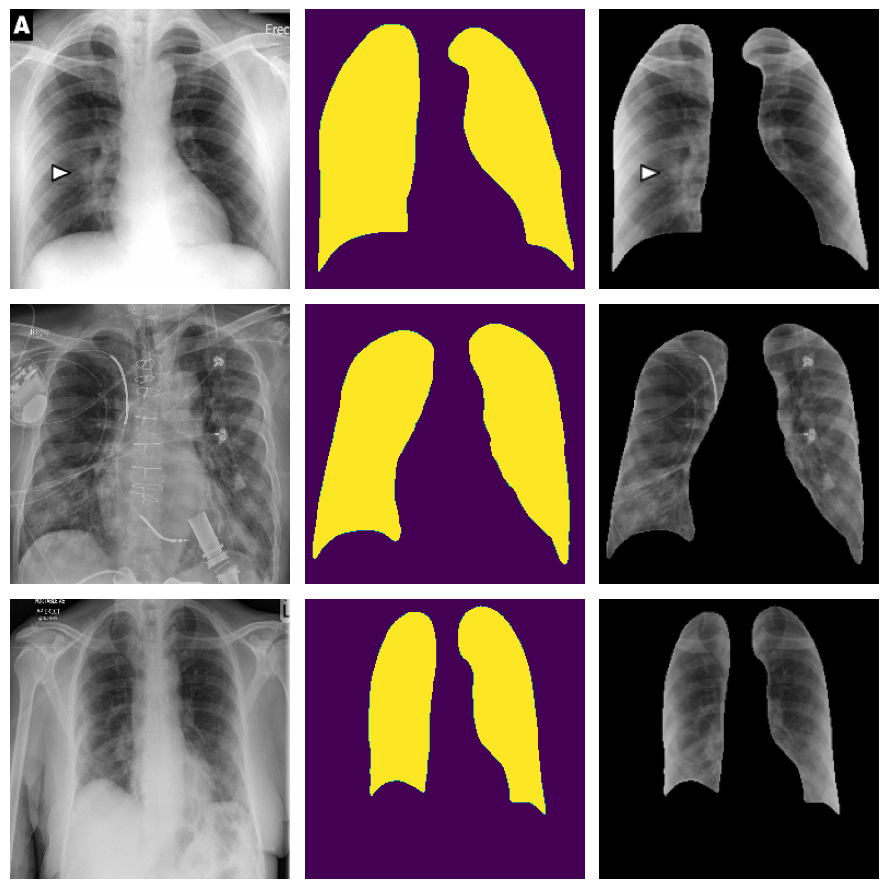

In [150]:
# Preparation des donnees, on masque les images
masked_image_array=[]

for i in range(images.shape[0]) : 
    img = images[i]
    msk = masks2[i].astype(img.dtype)
    masked_image = cv2.bitwise_and(img, msk)
    masked_image = cv2.resize(masked_image, dsize = (224, 224))
    masked_image = cv2.cvtColor(masked_image, cv2.COLOR_GRAY2RGB)
    masked_image_array.append(masked_image)

masked_images = np.array(masked_image_array).reshape(len(masked_image_array),224,224,3)

import random
import matplotlib.pyplot as plt

# On trace le graph pour 3 images

fig, axs = plt.subplots(3, 3, figsize=(9, 9))

for i in range(0, 9, 3):
    j = random.randint(0, len(labels)-1)
    
    axs[i//3, 0].imshow(images[j], cmap='gray')
    axs[i//3, 0].set_xlabel("Base Image")
    axs[i//3, 0].axis("off")
   
    axs[i//3, 1].imshow(masks2[j])
    axs[i//3, 1].set_xlabel("Predicted Mask")
    axs[i//3, 1].axis("off")
    
    axs[i//3, 2].imshow(masked_images[j])
    axs[i//3, 2].set_xlabel("Masked Images")
    axs[i//3, 2].axis("off")

plt.tight_layout()
plt.show()



Test avec le modele CHO

In [ ]:
# On prepare le datagenerator

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

clf_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    ) 

clf_dataset = clf_datagen.flow(masked_images, batch_size = 8, shuffle=False)

clf_model =  tf.keras.models.load_model("../models/model_resnet50_CHO_v1")


In [139]:
print("tailles fichiers images:", masked_images.shape, "taille de labels : ", len(labels))

# On fait les predictions

labels_pred = clf_model.predict(clf_dataset)

tailles fichiers images: (723, 224, 224, 3) taille de labels :  723


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(labels_pred, axis=1).astype("str")

y_pred[y_pred == '0'] = "COVID"
y_pred[y_pred == '1'] = "Lung_Opacity"
y_pred[y_pred == '2'] = "Normal"
y_pred[y_pred == '3'] = "Viral Pneumonia"

# On reconvertit labels covid en 1, normal en 3 selon le dataset initial
y_true = np.array(labels)
y_true[y_true == 'COVID'] = "Positive"
y_true[y_true == 'Normal'] = "Negative"

# On fait la matrice de confusion
pd.crosstab(y_true,y_pred, normalize=0)


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
row_0,,,,
Negati,0.381188,0.282178,0.334158,0.002475
Positi,0.695925,0.150470,0.141066,0.012539


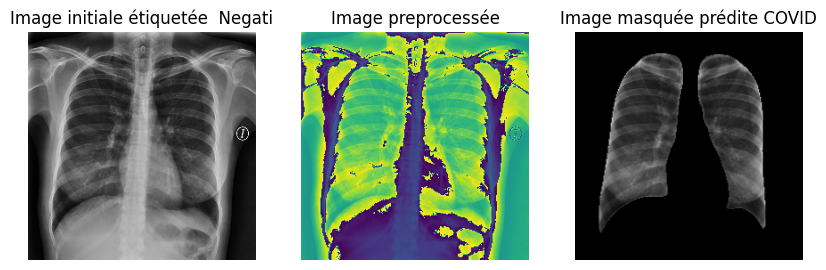

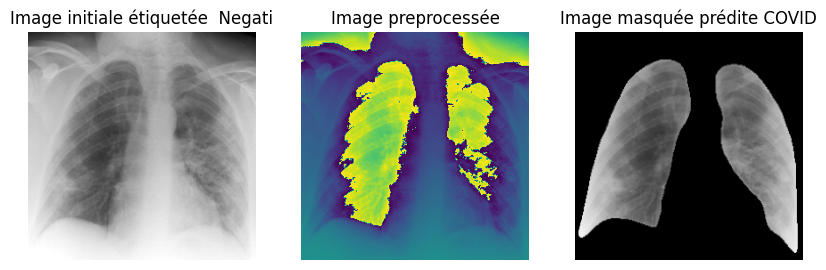

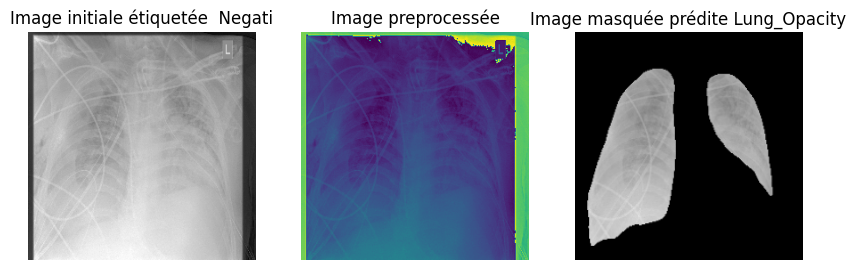

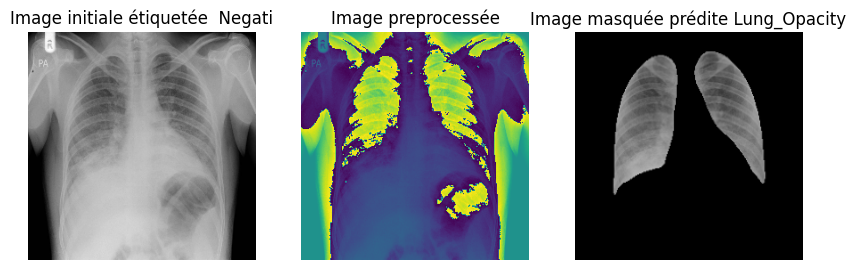

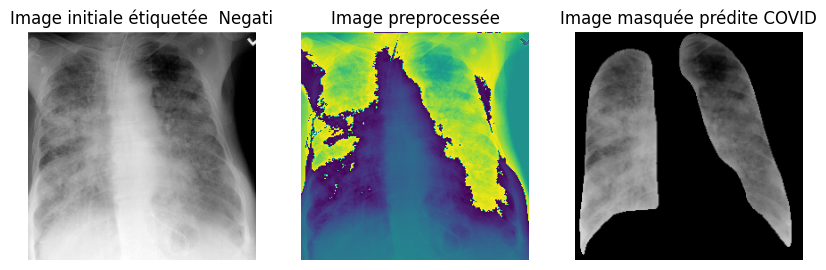

In [194]:
# Visualisation mal étiquetées

for j in range(10):
    i = random.randint(0,len(labels))
    if labels[i] != y_pred[i]:
       
        plt.figure(figsize=(10,5))
        
        plt.subplot(1,3,1)
        plt.imshow(images[i], cmap="gray")
        titre = "Image initiale étiquetée " + " " + y_true[i]
        plt.title(titre)
        plt.axis("off")

        
        plt.subplot(1,3,2)
        plt.imshow(images_scaled[i])
        titre = "Image preprocessée"
        plt.title(titre)
        plt.axis("off")

        plt.subplot(1,3,3)
        plt.imshow(masked_images[i])
        titre = "Image masquée prédite" + " " + y_pred[i]
        plt.title(titre)
        plt.axis("off")
        

Test avec le modele MME

In [7]:
# On charge le modele

clf_model = tf.keras.models.load_model("../models/EfficientNetB4_masked-Covid-19_masked-91.45.keras")



OSError: Unable to synchronously open file (file signature not found)